# Tidal Toy: Can We See the Needle?

**The dumbest possible experiment.**

Hypothesis: Dead tokens feel two forces:
1. **Gradient updates:** Uniform push along some direction r (antiparallel to h̄)
2. **Weight decay:** Radial pull toward origin, strength ∝ distance

These forces are only collinear along r. Off-axis, weight decay has a perpendicular component that pulls tokens *toward* r. Tidal compression.

Prediction: A cloud of points should collapse toward the r axis over time, forming a needle shape.

**Method:** 100 points in 2D. Scatter them N(0, 0.02). Apply both forces each step. Plot. Look with eyeballs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Reproducibility
np.random.seed(42)

print("Ready.")

Ready.


In [2]:
# === Parameters ===

NUM_TOKENS = 100
DIM = 2
INIT_STD = 0.02

# Forces
LR = 0.001           # Gradient step size (will be constant for v0)
WEIGHT_DECAY = 0.01  # Pull toward origin

# Simulation
STEPS = 500

# The "r" direction (gradient pushes along +r, or -r, we'll pick one)
# Let's say r points along x-axis for easy visualization
r = np.array([1.0, 0.0])
r = r / np.linalg.norm(r)  # unit vector (already is, but be safe)

print(f"Tokens: {NUM_TOKENS}")
print(f"LR: {LR}, Weight Decay: {WEIGHT_DECAY}")
print(f"Steps: {STEPS}")
print(f"r direction: {r}")

Tokens: 100
LR: 0.001, Weight Decay: 0.01
Steps: 500
r direction: [1. 0.]


In [3]:
# Initialize tokens
W = np.random.randn(NUM_TOKENS, DIM) * INIT_STD

# Store history for plotting traces
history = [W.copy()]

# Simulate
for t in range(STEPS):
    # Gradient force: push along +r (uniform for all tokens)
    F_grad = LR * r  # shape: (2,)
    
    # Weight decay: pull toward origin (proportional to position)
    F_wd = -WEIGHT_DECAY * W  # shape: (NUM_TOKENS, 2)
    
    # Update
    W = W + F_grad + F_wd
    
    # Record
    history.append(W.copy())

history = np.array(history)  # shape: (STEPS+1, NUM_TOKENS, 2)
print(f"Simulation complete. History shape: {history.shape}")

Simulation complete. History shape: (501, 100, 2)


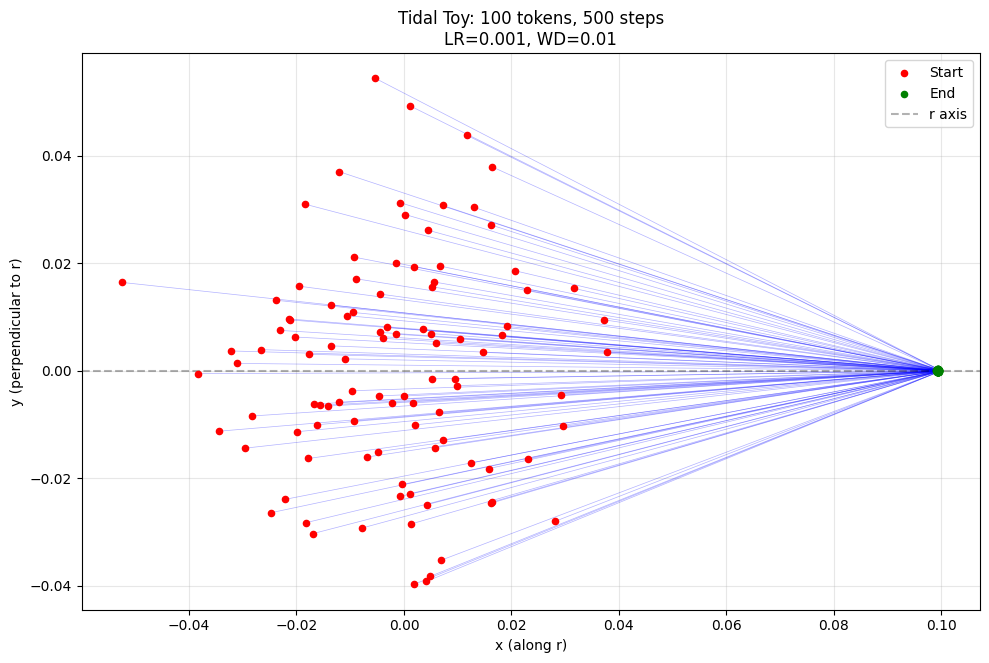

Saved: tidal_toy_traces@200.png


In [4]:
# Plot: traces of all tokens over time
fig, ax = plt.subplots(figsize=(10, 10))

# Draw traces as thin lines
for i in range(NUM_TOKENS):
    trace = history[:, i, :]  # (STEPS+1, 2)
    ax.plot(trace[:, 0], trace[:, 1], 'b-', alpha=0.3, linewidth=0.5)

# Mark start positions (red) and end positions (green)
ax.scatter(history[0, :, 0], history[0, :, 1], c='red', s=20, zorder=5, label='Start')
ax.scatter(history[-1, :, 0], history[-1, :, 1], c='green', s=20, zorder=5, label='End')

# Draw the r axis
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='r axis')

ax.set_xlabel('x (along r)')
ax.set_ylabel('y (perpendicular to r)')
ax.set_title(f'Tidal Toy: {NUM_TOKENS} tokens, {STEPS} steps\nLR={LR}, WD={WEIGHT_DECAY}')
ax.legend()
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tidal_toy_traces@200.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()
print("Saved: tidal_toy_traces@200.png")

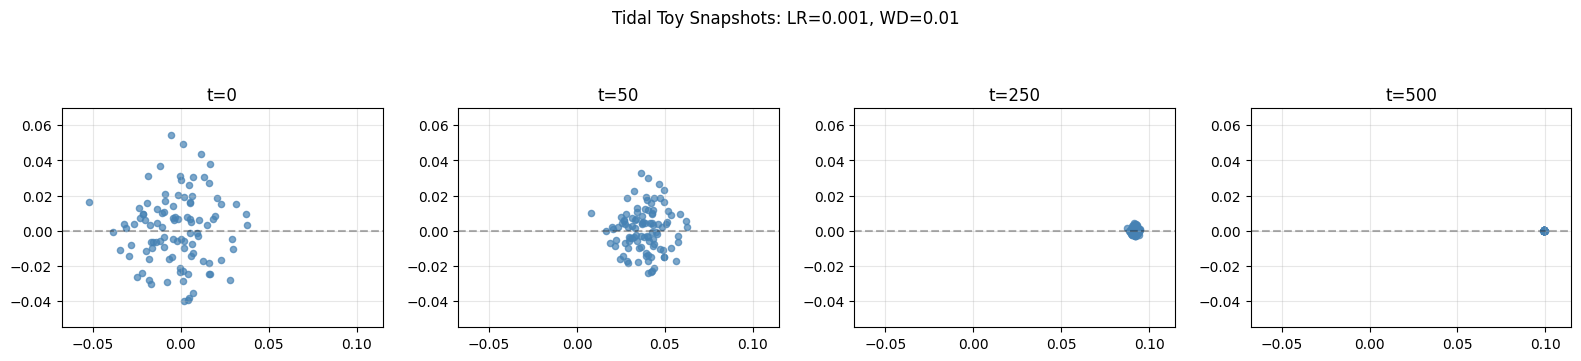

Saved: tidal_toy_snapshots@200.png


In [5]:
# Alternative view: snapshots at different times
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

snapshots = [0, STEPS//10, STEPS//2, STEPS]
titles = ['t=0', f't={STEPS//10}', f't={STEPS//2}', f't={STEPS}']

# Find global bounds for consistent axes
all_x = history[:, :, 0].flatten()
all_y = history[:, :, 1].flatten()
xmin, xmax = all_x.min(), all_x.max()
ymin, ymax = all_y.min(), all_y.max()
margin = 0.1 * max(xmax - xmin, ymax - ymin)

for ax, t, title in zip(axes, snapshots, titles):
    ax.scatter(history[t, :, 0], history[t, :, 1], c='steelblue', s=20, alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax.set_xlim(xmin - margin, xmax + margin)
    ax.set_ylim(ymin - margin, ymax + margin)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

fig.suptitle(f'Tidal Toy Snapshots: LR={LR}, WD={WEIGHT_DECAY}', fontsize=12)
plt.tight_layout()
plt.savefig('tidal_toy_snapshots@200.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()
print("Saved: tidal_toy_snapshots@200.png")

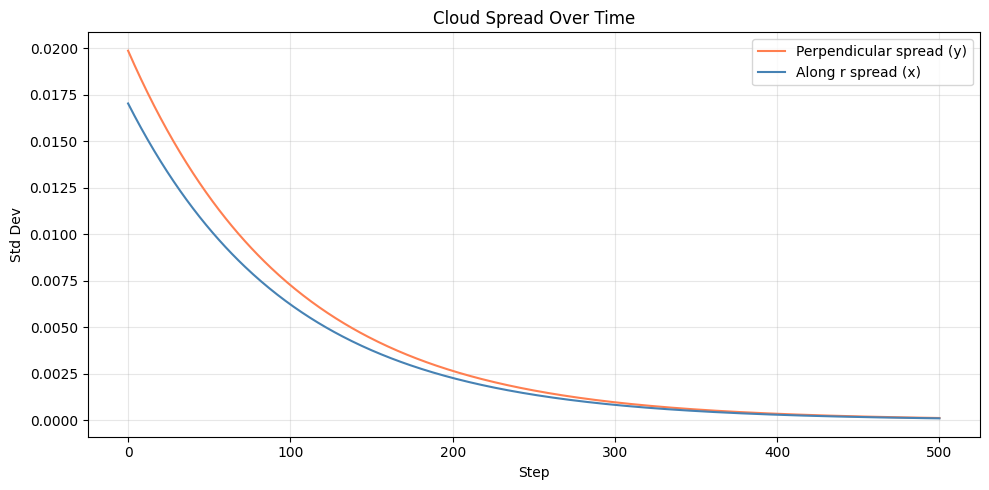


Initial perpendicular spread: 0.019877
Final perpendicular spread: 0.000131
Ratio: 0.0066


In [6]:
# Quantify: perpendicular spread over time
# (Just to confirm what our eyes see)

perp_spread = []  # std of y-coordinate over time
along_spread = []  # std of x-coordinate over time

for t in range(len(history)):
    perp_spread.append(history[t, :, 1].std())
    along_spread.append(history[t, :, 0].std())

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(perp_spread, label='Perpendicular spread (y)', color='coral')
ax.plot(along_spread, label='Along r spread (x)', color='steelblue')
ax.set_xlabel('Step')
ax.set_ylabel('Std Dev')
ax.set_title('Cloud Spread Over Time')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tidal_toy_spread@200.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\nInitial perpendicular spread: {perp_spread[0]:.6f}")
print(f"Final perpendicular spread: {perp_spread[-1]:.6f}")
print(f"Ratio: {perp_spread[-1]/perp_spread[0]:.4f}")

## What Do We See?

**If the hypothesis is right:**
- Traces should curve toward the r axis (y=0)
- End positions should be much tighter in y than start positions
- Perpendicular spread should decay exponentially

**If we're wrong:**
- We'll see something else and learn from it